In [1]:
import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

I took this data form https://archive.ics.uci.edu/ml/datasets/ILPD+%28Indian+Liver+Patient+Dataset%29 location.

In [11]:
col_names = ['Age', 'IsMale', 'TotalBilirubin', 'DirectBilirubin', 'AlkphosAlkalinePhosphotase', 'SgptAlamineAminotransferase', 'SgotAspartateAminotransferase', 'TPTotalProtiens', 'ALBAlbumin','AlbuminAndGlobulinRatio', 'Classification']
df = pd.read_csv("Indian_Liver_Patient_Dataset.csv",header=None, names=col_names)
df["AlbuminAndGlobulinRatio"].fillna(0, inplace = True)

In [12]:
df.head()

,Age,IsMale,TotalBilirubin,DirectBilirubin,AlkphosAlkalinePhosphotase,SgptAlamineAminotransferase,SgotAspartateAminotransferase,TPTotalProtiens,ALBAlbumin,AlbuminAndGlobulinRatio,Classification
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [13]:
#split dataset in features and target variable
feature_cols = ['Age', 'IsMale', 'TotalBilirubin', 'DirectBilirubin', 'AlkphosAlkalinePhosphotase', 'SgptAlamineAminotransferase', 'SgotAspartateAminotransferase', 'TPTotalProtiens', 'ALBAlbumin','AlbuminAndGlobulinRatio']
X = df[feature_cols] 
y = df.Classification

In [14]:
# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
X_train

,Age,IsMale,TotalBilirubin,DirectBilirubin,AlkphosAlkalinePhosphotase,SgptAlamineAminotransferase,SgotAspartateAminotransferase,TPTotalProtiens,ALBAlbumin,AlbuminAndGlobulinRatio
213,8,0,0.9,0.2,401,25,58,7.5,3.4,0.80
532,62,1,0.7,0.2,162,12,17,8.2,3.2,0.60
361,65,0,0.7,0.2,182,23,28,6.8,2.9,0.70
443,42,0,0.7,0.2,152,35,81,6.2,3.2,1.06
399,27,1,1.0,0.2,205,137,145,6.0,3.0,1.00
...,...,...,...,...,...,...,...,...,...,...
277,60,1,2.0,0.8,190,45,40,6.0,2.8,0.80
9,55,1,0.7,0.2,290,53,58,6.8,3.4,1.00
359,69,0,0.8,0.2,146,42,70,8.4,4.9,1.40
192,60,1,2.3,0.6,272,79,51,6.6,3.5,1.10


In [17]:
y_train

213    1
532    0
361    0
443    1
399    1
      ..
277    1
9      1
359    0
192    1
559    1
Name: Classification, Length: 437, dtype: int64

In [18]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

/home/ubuntu1/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred=logreg.predict(X_test)

In [20]:
# import the Confusion Metrics class
from sklearn import metrics
CM = metrics.confusion_matrix(y_test, y_pred)
CM

array([[ 7, 39],
       [ 6, 94]])

# Visualizing Confusion Matrix using Heatmap

In [21]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

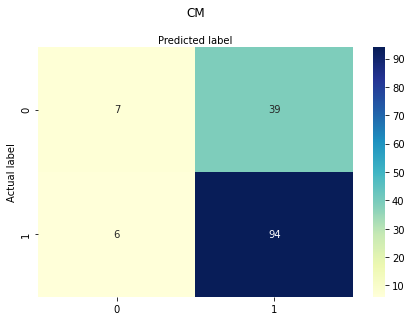

In [22]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(CM), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('CM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6917808219178082
Precision: 0.706766917293233
Recall: 0.94


# ROC Curve

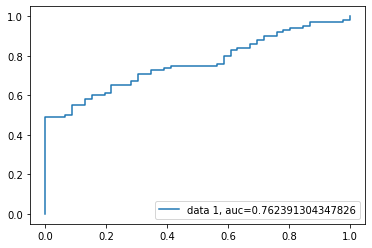

In [24]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()